In [21]:
import gensim.downloader as api
from gensim.models import Word2Vec 
import numpy as np
import pandas as pd

tokens = np.load('tokenized.npy', allow_pickle=True)
token_df = pd.DataFrame(tokens, columns=['review'])

# w2v = Word2Vec(sentences=tokens).wv
w2v = api.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [22]:
#Sp
positive = ['excellent', 'amazing', 'fantastic', 'wonderful', 'delightful', 'superb', 'incredible', 'outstanding', 'terrific', 'awesome', 
            'good', 'great', 'lovely', 'pleasant', 'enjoyable', 'satisfying', 'impressive', 'favorable', 'positive', 'pleasant', 'perfect']

#Sn
negative = ['terrible', 'awful', 'horrible', 'dreadful', 'abysmal', 'appalling', 'atrocious', 'disgusting', 'revolting', 'abominable', 'bad', 'poor', 
            'unpleasant', 'unsatisfactory', 'disappointing', 'unfavorable', 'negative', 'unenjoyable', 'dissatisfied', 'displeasing']

In [26]:
def sentiment(review):
    if len(review) > 0:
        return w2v.n_similarity(review, positive) - w2v.n_similarity(review, negative)
    else:
        return 0

In [24]:
token_df.head(500)

,review
0,"[tried, give, company, benefit, doubt, read, r..."
1,"[ended, serendipity, white, horse, also, amazi..."
2,"[bouncer, actively, enforcing, cdc, social, di..."
3,"[place, comfortable, hate, nacho, melted, ched..."
4,"[great, food, great, staff, rack, mack, burger..."
...,...
495,"[large, bucket, ball, crazy, also, took, prize..."
496,"[im, still, patiently, waiting, someone, reach..."
497,"[briscola, treated, well, year, coming, gsr, i..."
498,"[going, every, time, stay, grand, sierra, reso..."


In [27]:
token_df['sentiment'] = token_df['review'].apply(lambda review: sentiment(review))

In [28]:
token_df.head()

,review,sentiment
0,"[tried, give, company, benefit, doubt, read, r...",0.242703
1,"[ended, serendipity, white, horse, also, amazi...",0.324215
2,"[bouncer, actively, enforcing, cdc, social, di...",0.184383
3,"[place, comfortable, hate, nacho, melted, ched...",0.134130
4,"[great, food, great, staff, rack, mack, burger...",0.418598


<Axes: xlabel='sentiment', ylabel='Count'>

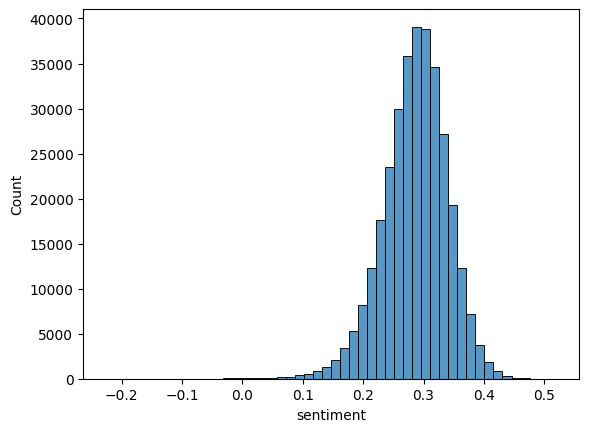

In [33]:
import seaborn as sns

sns.histplot(data=token_df, x='sentiment', bins=50)

In [34]:
token_df['sentiment'].to_csv('./data/sentiments.csv')